In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.backend as K
from keras.models import Sequential # to see the sequence like ip --> hl1 --> hl2--> hl3 -->o/p #to build layer by layer architecture
from keras.layers import Dense # to decide the depth of layers
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from keras.models import load_model

In [3]:
df = pd.read_csv('dvd_final_csv.csv')

In [4]:
df

,inventory_id,film_id,title,rental_duration,rental_rate,length,replacement_cost,rating,category,language,store_id,rental_id,rental_date,customer_id,return_date,amount,active
0,3419,749,Rules Human,6,4.99,153,19.99,R,Horror,English,1,1520,2005-06-15 23:57:20,341,2005-06-24 23:46:20,7.99,1
1,2512,552,Majestic Floats,5,0.99,130,15.99,PG,Documentary,English,2,1778,2005-06-16 18:54:48,341,2005-06-22 16:08:48,1.99,1
2,2507,551,Maiden Home,3,4.99,138,9.99,PG,New,English,1,1849,2005-06-17 00:13:19,341,2005-06-23 18:37:19,7.99,1
3,2047,445,Hyde Doctor,5,2.99,100,11.99,G,Classics,English,1,2829,2005-06-19 21:11:30,341,2005-06-24 18:10:30,2.99,1
4,2569,563,Massacre Usual,6,4.99,165,16.99,R,Games,English,1,3130,2005-06-20 19:03:22,341,2005-06-29 18:05:22,7.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591,1148,254,Driver Annie,4,2.99,159,11.99,PG-13,Sports,English,1,12682,2006-02-14 15:16:03,245,NaN,2.99,1
14592,3998,870,Swarm Gold,4,0.99,123,12.99,PG-13,Horror,English,2,14107,2006-02-14 15:16:03,251,NaN,0.99,1
14593,1146,253,Drifter Commandments,5,4.99,61,18.99,PG-13,Action,English,2,13756,2006-02-14 15:16:03,252,NaN,4.99,1
14594,1219,270,Earth Vision,7,0.99,85,29.99,NC-17,New,English,2,15293,2006-02-14 15:16:03,263,NaN,0.99,1


In [4]:
df.isnull().sum()

inventory_id          0
film_id               0
title                 0
rental_duration       0
rental_rate           0
length                0
replacement_cost      0
rating                0
category              0
language              0
store_id              0
rental_id             0
rental_date           0
customer_id           0
return_date         183
amount                0
active                0
dtype: int64

In [5]:
df.dropna(inplace=True)


In [6]:
# Ensure the rental_date and return_date are in datetime format
df['rental_date'] = pd.to_datetime(df['rental_date'])
df['return_date'] = pd.to_datetime(df['return_date'])

# Calculate the difference in days between return_date and rental_date
df['rental_actual_duration'] = (df['return_date'] - df['rental_date']).dt.days

In [7]:
df.drop('rental_date', axis=1, inplace=True)

df.head()

,inventory_id,film_id,title,rental_duration,rental_rate,length,replacement_cost,rating,category,language,store_id,rental_id,customer_id,return_date,amount,active,rental_actual_duration
0,3419,749,Rules Human,6,4.99,153,19.99,R,Horror,English,1,1520,341,2005-06-24 23:46:20,7.99,1,8
1,2512,552,Majestic Floats,5,0.99,130,15.99,PG,Documentary,English,2,1778,341,2005-06-22 16:08:48,1.99,1,5
2,2507,551,Maiden Home,3,4.99,138,9.99,PG,New,English,1,1849,341,2005-06-23 18:37:19,7.99,1,6
3,2047,445,Hyde Doctor,5,2.99,100,11.99,G,Classics,English,1,2829,341,2005-06-24 18:10:30,2.99,1,4
4,2569,563,Massacre Usual,6,4.99,165,16.99,R,Games,English,1,3130,341,2005-06-29 18:05:22,7.99,1,8


In [8]:
df.drop('return_date', axis=1, inplace=True)

In [9]:
df.isnull().sum()


inventory_id              0
film_id                   0
title                     0
rental_duration           0
rental_rate               0
length                    0
replacement_cost          0
rating                    0
category                  0
language                  0
store_id                  0
rental_id                 0
customer_id               0
amount                    0
active                    0
rental_actual_duration    0
dtype: int64

In [10]:
df.drop('title',axis=1,inplace=True)
df.drop(['inventory_id','film_id','store_id','rental_id','customer_id'], axis=1, inplace=True)  #metadata so removing 
df.drop('language',axis=1, inplace=True)

In [11]:
# categorical_column_to_iterate = ['rating', 'category']
# continuous_column_to_iterate = ['amount', 'rental_rate', 'replacement_cost']

In [11]:
df['rating'].value_counts()


rating
PG-13    3203
NC-17    2964
PG       2903
R        2868
G        2475
Name: count, dtype: int64

In [12]:
df['rating'] = df['rating'].map({"PG-13":0,'NC-17':1,'PG':2,'R':3,"G":4}) #mapping and forming with 0th index and so on


In [13]:
df['rating'].value_counts() #manually encoded since there should be a limited version to be uploaded on aws 
#and I chose to do manually bcz i dont want to dup so many into deep learning like one hot encoder, pickle file since my system capability is slow


rating
0    3203
1    2964
2    2903
3    2868
4    2475
Name: count, dtype: int64

In [14]:
df['category'].value_counts()


category
Sports         1066
Animation      1044
Action          996
Sci-Fi          990
Family          975
Drama           946
Foreign         942
Documentary     930
Games           870
Children        855
New             851
Classics        851
Comedy          842
Horror          761
Travel          755
Music           739
Name: count, dtype: int64

In [15]:
df['category'].unique()


array(['Horror', 'Documentary', 'New', 'Classics', 'Games', 'Sci-Fi',
       'Foreign', 'Family', 'Travel', 'Music', 'Sports', 'Comedy',
       'Drama', 'Action', 'Children', 'Animation'], dtype=object)

In [16]:
df['category'] = df['category'].map({'Horror':0, 'Documentary':1, 'New':2, 'Classics':3, 'Games':4, 'Sci-Fi':5,
       'Foreign':6, 'Family':7, 'Travel':8, 'Music':9, 'Sports':10, 'Comedy':11,
       'Drama':12, 'Action':13, 'Children':14, 'Animation':15}) #encoding manually

In [17]:
df['category'].value_counts()


category
10    1066
15    1044
13     996
5      990
7      975
12     946
6      942
1      930
4      870
14     855
2      851
3      851
11     842
0      761
8      755
9      739
Name: count, dtype: int64

In [18]:
df.head()


,rental_duration,rental_rate,length,replacement_cost,rating,category,amount,active,rental_actual_duration
0,6,4.99,153,19.99,3,0,7.99,1,8
1,5,0.99,130,15.99,2,1,1.99,1,5
2,3,4.99,138,9.99,2,2,7.99,1,6
3,5,2.99,100,11.99,4,3,2.99,1,4
4,6,4.99,165,16.99,3,4,7.99,1,8


In [19]:
# Separate features and target
x = df.drop('amount', axis=1)  # Replace 'revenue_column' with the actual column name for revenue
y = df['amount']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)


In [21]:
scaler = StandardScaler() #for normalisation 
scaler.fit(x_train)

StandardScaler()

In [22]:
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)


In [23]:
x_train_scaler_df=pd.DataFrame(x_train_scaler,columns = x_train.columns)
x_test_scaler_df=pd.DataFrame(x_test_scaler,columns = x_test.columns)

In [24]:
x_test_scaler_df


,rental_duration,rental_rate,length,replacement_cost,rating,category,active,rental_actual_duration
0,-0.673610,-1.177449,-0.231831,0.947206,0.071154,0.937539,0.160969,-1.341530
1,-0.673610,1.246058,0.141665,1.275611,0.071154,-1.226752,0.160969,-0.203127
2,1.468296,1.246058,-0.306531,-1.351628,-0.640976,-0.361036,0.160969,-0.203127
3,0.754327,1.246058,-0.754727,0.454599,1.495414,0.071823,0.160969,-1.341530
4,-0.673610,1.246058,0.739260,1.275611,-1.353107,0.937539,0.160969,0.555808
...,...,...,...,...,...,...,...,...
3599,-1.387579,-1.177449,-0.779626,1.604016,0.783284,0.504681,0.160969,-0.582594
3600,-0.673610,-1.177449,0.515162,-1.187426,-1.353107,1.370397,0.160969,-1.341530
3601,0.040358,1.246058,0.614761,-0.694818,0.071154,0.071823,0.160969,-0.203127
3602,0.040358,1.246058,0.166565,-0.530616,1.495414,1.586826,0.160969,0.176341


In [25]:
x_train_scaler_df.shape[1]


8

In [26]:
y_train.shape


(10809,)

In [27]:
from tensorflow.keras.layers import PReLU

In [29]:
model = Sequential()
#input dimension 8 neuron - developer scope
model.add(Dense(512,input_dim = x_train_scaler_df.shape[1],activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer1
model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer2
model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(64,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3

model.add(Dense(1)) #output layer
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.F1Score(),"accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

c:\Users\Prathee\Desktop\dvdrentaldl\.venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\Prathee\Desktop\dvdrentaldl\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,721 (1018.44 KB)

 Trainable params: 260,721 (1018.44 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
x_train_scaler_df.shape, y_train.shape


((10809, 8), (10809,))

In [29]:
x_train_scaler_df.columns


Index(['rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'category', 'active', 'rental_actual_duration'],
      dtype='object')

In [33]:
result = model.fit(x_train_scaler_df,y_train,epochs=10,validation_split=0.2)


Epoch 1/10


c:\Users\Prathee\Desktop\dvdrentaldl\.venv\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0000e+00 - f1_score: 1.6204 - loss: 5.0884e-07 - precision: 0.0000e+00 - recall: 0.0000e+00

c:\Users\Prathee\Desktop\dvdrentaldl\.venv\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


271/271 ━━━━━━━━━━━━━━━━━━━━ 38s 64ms/step - accuracy: 0.0000e+00 - f1_score: 1.6203 - loss: 5.0882e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 1.6181 - val_loss: 5.0514e-07 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.0000e+00 - f1_score: 1.6150 - loss: 5.0014e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 1.6181 - val_loss: 5.0514e-07 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.0000e+00 - f1_score: 1.6163 - loss: 5.0215e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 1.6181 - val_loss: 5.0514e-07 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.0000e+00 - f1_score: 1.6125 - loss: 4.9640e-07 - precision: 0.0000e+00 - recall: 0.00

In [34]:
result.history

{'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'f1_score': [1.6169358491897583,
  1.6169359683990479,
  1.6169359683990479,
  1.6169359683990479,
  1.6169358491897583,
  1.6169359683990479,
  1.6169359683990479,
  1.6169359683990479,
  1.6169358491897583,
  1.6169359683990479],
 'loss': [5.031890282225504e-07,
  5.031890850659693e-07,
  5.031890850659693e-07,
  5.031890850659693e-07,
  5.031890282225504e-07,
  5.031890282225504e-07,
  5.031890282225504e-07,
  5.031890282225504e-07,
  5.031890282225504e-07,
  5.031890850659693e-07],
 'precision': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'recall': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_f1_score': [1.6181354522705078,
  1.6181354522705078,
  1.6181354522705078,
  1.6181354522705078,
  1.6181354522705078,
  1.6181354522705078,
  1.6181354522705078,
  1.6181354522705078,
  1.6181354522705078,
  1.6181354522705078],
 'val_lo

In [35]:
result_df = pd.DataFrame(result.history)
result_df

,accuracy,f1_score,loss,precision,recall,val_accuracy,val_f1_score,val_loss,val_precision,val_recall
0,0.0,1.616936,5.031890e-07,0.0,0.0,0.0,1.618135,5.051443e-07,0.0,0.0
1,0.0,1.616936,5.031891e-07,0.0,0.0,0.0,1.618135,5.051443e-07,0.0,0.0
2,0.0,1.616936,5.031891e-07,0.0,0.0,0.0,1.618135,5.051443e-07,0.0,0.0
3,0.0,1.616936,5.031891e-07,0.0,0.0,0.0,1.618135,5.051443e-07,0.0,0.0
4,0.0,1.616936,5.031890e-07,0.0,0.0,0.0,1.618135,5.051443e-07,0.0,0.0
5,0.0,1.616936,5.031890e-07,0.0,0.0,0.0,1.618135,5.051443e-07,0.0,0.0
6,0.0,1.616936,5.031890e-07,0.0,0.0,0.0,1.618135,5.051443e-07,0.0,0.0
7,0.0,1.616936,5.031890e-07,0.0,0.0,0.0,1.618135,5.051443e-07,0.0,0.0
8,0.0,1.616936,5.031890e-07,0.0,0.0,0.0,1.618135,5.051443e-07,0.0,0.0
9,0.0,1.616936,5.031891e-07,0.0,0.0,0.0,1.618135,5.051443e-07,0.0,0.0


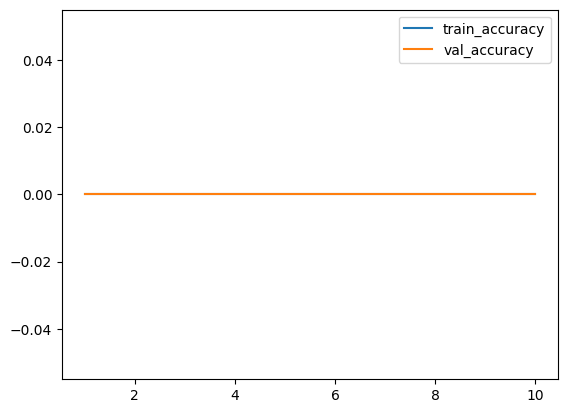

In [36]:
plt.plot(range(1,11),result_df["accuracy"],label="train_accuracy")
plt.plot(range(1,11),result_df["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

In [37]:
model.predict(x_test)


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


array([[ 0.02545393],
       [ 0.0221858 ],
       [-0.02073124],
       ...,
       [-0.02149412],
       [ 0.02530158],
       [ 0.04750025]], dtype=float32)

In [38]:
model.evaluate (x = x_test, y = y_test)


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.0000e+00 - f1_score: 1.6173 - loss: 5.0394e-07 - precision: 0.0000e+00 - recall: 0.0000e+00


[5.005516072742466e-07, 1.6153062582015991, 0.0, 0.0, 0.0]

ReLu Model

In [32]:
x_train.shape[1]

8

In [31]:
x_test.shape

(3604, 8)

Deep learning actual model(Relu)

In [46]:
model1 = Sequential()
# Input layer (match input shape to your data)
model1.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))

# Hidden layers
model1.add(Dense(256, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(16, activation='relu'))


model1.add(Dense(1))

# Compile the model for regression with 'mse' loss function
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError(), MeanAbsoluteError()])

c:\Users\Prathee\Desktop\dvdrentaldl\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,449 (1017.38 KB)

 Trainable params: 260,449 (1017.38 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
result = model1.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - loss: 4.4287 - mean_absolute_error: 1.5558 - mean_squared_error: 4.4287 - val_loss: 0.5739 - val_mean_absolute_error: 0.6086 - val_mean_squared_error: 0.5739
Epoch 2/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - loss: 0.5680 - mean_absolute_error: 0.5906 - mean_squared_error: 0.5680 - val_loss: 0.5794 - val_mean_absolute_error: 0.6678 - val_mean_squared_error: 0.5794
Epoch 3/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - loss: 0.2491 - mean_absolute_error: 0.3757 - mean_squared_error: 0.2491 - val_loss: 0.1559 - val_mean_absolute_error: 0.3027 - val_mean_squared_error: 0.1559
Epoch 4/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 0.2145 - mean_absolute_error: 0.3461 - mean_squared_error: 0.2145 - val_loss: 0.2685 - val_mean_absolute_error: 0.3355 - val_mean_squared_error: 0.2685
Epoch 5/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 0.1933 - mean_absolute_error: 0.3328 - mean_squared_error: 0.1933 - val_loss:

In [49]:
result.history

{'loss': [2.148165464401245,
  0.4474361538887024,
  0.23541684448719025,
  0.1993638277053833,
  0.19116656482219696,
  0.17690853774547577,
  0.21676690876483917,
  0.17085453867912292,
  0.18530121445655823,
  0.17189979553222656,
  0.1758148968219757,
  0.20061495900154114,
  0.1692713052034378,
  0.175153911113739,
  0.18570134043693542,
  0.15712788701057434,
  0.1592770665884018,
  0.16819551587104797,
  0.1740826666355133,
  0.16937606036663055,
  0.16942648589611053,
  0.16888020932674408,
  0.1568969190120697,
  0.15993638336658478,
  0.19024772942066193,
  0.1649572253227234,
  0.1506447196006775,
  0.15863260626792908,
  0.16409194469451904,
  0.14969870448112488,
  0.16429495811462402,
  0.17453500628471375,
  0.15190467238426208,
  0.15417616069316864,
  0.15850119292736053,
  0.17628107964992523,
  0.14930763840675354,
  0.15140046179294586,
  0.16501609981060028,
  0.15136513113975525,
  0.14690163731575012,
  0.15102669596672058,
  0.1598488986492157,
  0.1575674712657

In [50]:
result.history.keys()


dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])

In [51]:
result_df = pd.DataFrame(result.history)
result_df

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,2.148165,1.058031,2.148165,0.573879,0.608626,0.573879
1,0.447436,0.515880,0.447436,0.579405,0.667814,0.579405
2,0.235417,0.364817,0.235417,0.155949,0.302708,0.155949
3,0.199364,0.334947,0.199364,0.268546,0.335501,0.268546
4,0.191167,0.328715,0.191167,0.260118,0.355268,0.260118
...,...,...,...,...,...,...
95,0.149093,0.279067,0.149093,0.156702,0.275681,0.156702
96,0.141151,0.271419,0.141151,0.134996,0.276590,0.134996
97,0.138141,0.268524,0.138141,0.131106,0.259494,0.131106
98,0.139799,0.269119,0.139799,0.131990,0.260294,0.131990


In [52]:
# Evaluate the model
test_loss = model1.evaluate(x_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1642 - mean_absolute_error: 0.2949 - mean_squared_error: 0.1642
Test Loss (MSE): [0.17214243113994598, 0.17214243113994598, 0.30457207560539246]


In [53]:
from sklearn.metrics import r2_score
y_pred = model1.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
R² score: 0.96870087434551


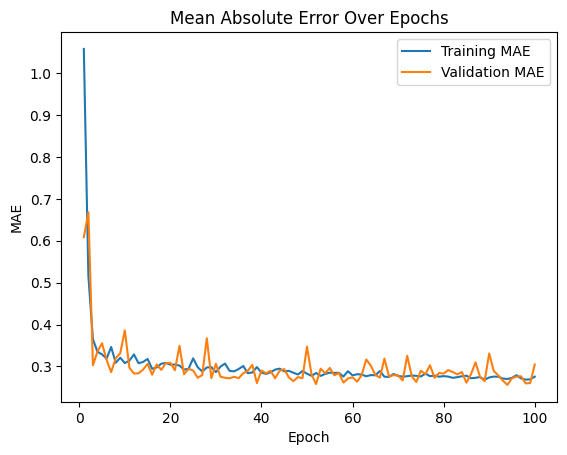

In [54]:
# Plot Mean Absolute Error (MAE) over epochs
plt.plot(range(1, 101), result_df['mean_absolute_error'], label='Training MAE')
plt.plot(range(1, 101), result_df['val_mean_absolute_error'], label='Validation MAE')

plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

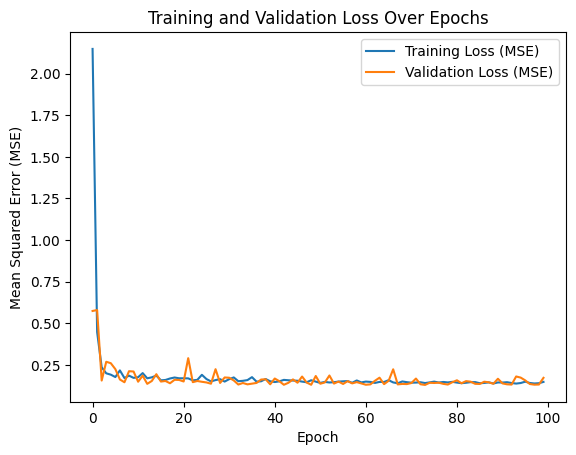

In [55]:
# Plot the training and validation loss
plt.plot(result.history['loss'], label='Training Loss (MSE)')
plt.plot(result.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


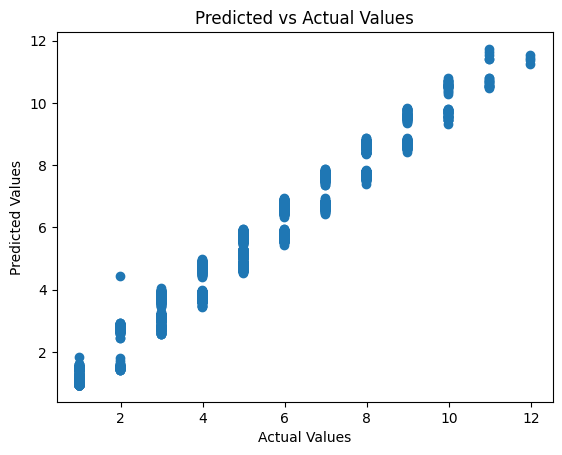

In [56]:
# Get predictions for the test set
y_pred = model1.predict(x_test)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [57]:
# Get predictions for the test set
y_pred = model1.predict(x_test)

# If y_test is a pandas Series, convert it to a NumPy array
if isinstance(y_test, pd.Series):
    y_test = y_test.values

# Flatten y_pred if it's a 2D array
y_pred = y_pred.flatten()

# Calculate residuals (errors)
residuals = y_test - y_pred

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


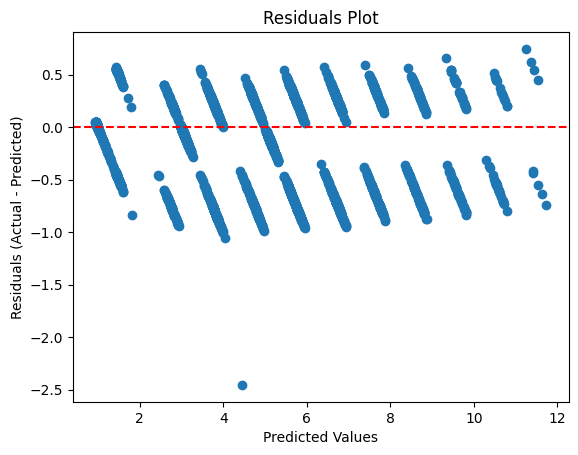

In [58]:
# Plot residuals
plt.scatter(y_pred, residuals)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [59]:
model1.save("dl_relu.h5")

In [60]:
new_model = load_model("dl_relu.h5")

In [61]:
first_row = x_test.iloc[0].to_numpy()


In [66]:
x_test

,rental_duration,rental_rate,length,replacement_cost,rating,category,active,rental_actual_duration
10267,4,0.99,106,25.99,2,12,1,1
6094,4,4.99,121,27.99,2,2,1,4
4721,7,4.99,103,11.99,1,6,1,4
5757,6,4.99,85,22.99,4,8,1,1
616,4,4.99,145,27.99,0,12,1,6
...,...,...,...,...,...,...,...,...
2241,3,0.99,84,29.99,3,10,1,3
4928,4,0.99,136,12.99,0,14,1,1
12637,5,4.99,140,15.99,2,8,1,4
12287,5,4.99,122,16.99,4,15,1,5


In [65]:
first_row


array([  4.  ,   0.99, 106.  ,  25.99,   2.  ,  12.  ,   1.  ,   1.  ])

In [63]:
for x in first_row:  #checking whether float or not since .py file predicts float crtly
    print(type(x))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [64]:
new_model.predict(np.array([first_row]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


array([[0.96157557]], dtype=float32)

In [67]:
x_test['rental_duration'].value_counts()

rental_duration
3    777
4    753
6    750
5    683
7    641
Name: count, dtype: int64